<a href="https://colab.research.google.com/github/Kaush80/machine_learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
class Perceptron:
  '''
  Classifier with perceptron rule

  Parameters
  ----------
  eta : float
        learning rate (between 0.0 - 1.0)
  n_iter : int
          number of epochs
  random_state : int
      Random number generator seed for random weight
      initialization.
  Attributes
  ----------
  w_ : 1d-array
      weights after fitting
  
  errors_ : 1d-array
            number of errors in each epoch
  '''
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state=random_state

  def fit(self,X,y):
    '''
    Fit training data

    Parameters:
    -----------
    X: later
    '''
    rgen=np.random.RandomState(self.random_state)
    self.w_= rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_=[]
    for _ in range(self.n_iter):
      errors=0
      for xi , target in zip(X,y):
        update=self.eta*(target - self.predict(xi))
        self.w_[1:]+=update*xi
        self.w_[0]+=update
        errors+=int(update !=0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X,self.w_[1:])+self.w_[0] 

  def predict(self,X):
    '''returns class label afer unit step'''
    return np.where(self.net_input(X)>=0.0,1,-1)


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None)

In [ ]:
df.tail

<bound method NDFrame.tail of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

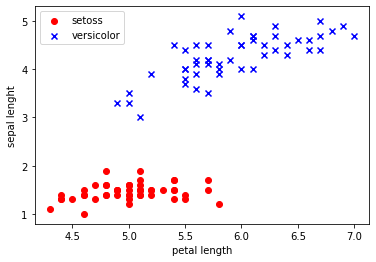

In [ ]:
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa', -1,1)
X=df.iloc[0:100,[0,2]].values
plt.scatter(X[0:50,0],X[0:50,1],color='red',marker='o',label='setoss')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal lenght')
plt.legend(loc='upper left')
plt.show()

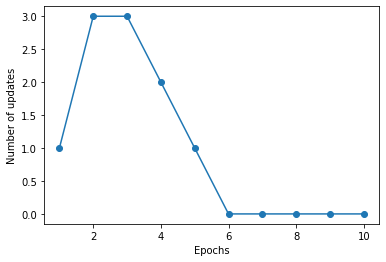

In [ ]:

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')


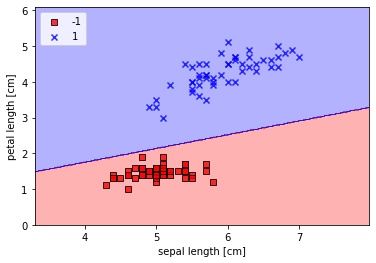

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()
